Download links:
- DFDE : https://dfde.efi.int/db/dfde_app.php

# Method :

1. GeoParsing using https://github.com/ArthurCalvi/GeoParsing 
2. Cleaning the name of tree specie

In [1]:
import geopandas as gpd 

dfde = gpd.read_parquet('../data/DFDE/FR/DFDE_1984_2021_EPSG4326_FR.parquet')
dfde

,id,start_date,end_date,cause,area,species,notes,country,location,name,geometry,area_km,reference,reference_long
0,1136,1984-01-01 00:00:00,1984-12-28 00:00:00,Fire,14664.0,None,'Provence-Alpes-Côte d'Azur; Auvergne-Rhône-Al...,France,Republic of France(FR),"intersection: Auvergne-Rhône-Alpes,Midi-Pyréné...","POLYGON ((5.49478 44.11518, 5.46037 44.11834, ...",0.000000,Chevrou R. 1998,"Chevrou, R., 1998. Prévention et lutte contre ..."
1,30369,1984-01-01 00:00:00,1984-12-28 00:00:00,Wind,NaN,None,Mainly oak and beech,France,Vosges(FR),Vosges,"POLYGON ((5.39361 48.39177, 5.39367 48.39171, ...",5897.726024,Guillery 1987,"Guillery, C. (1987). “Introduction.” Revue For..."
2,57306,1984-02-01 00:00:00,1984-02-28 00:00:00,Wind,NaN,None,State forest,France;France;France,Picardie(FR);Bagnoles de l'Orne Normandie(FR);...,Bagnoles-de-l'Orne-Normandie,"POLYGON ((-0.44611 48.56126, -0.44606 48.56117...",15.949458,Aspect Historique 2000,"Aspect Historique de Chablis 2000, ONF"
3,57309,1984-11-01 00:00:00,1984-11-28 00:00:00,Wind,NaN,None,State forest,France;France,Picardie(FR);Bagnoles de l'Orne Normandie(FR),Bagnoles-de-l'Orne-Normandie,"POLYGON ((-0.44611 48.56126, -0.44606 48.56117...",15.949458,Aspect Historique 2000,"Aspect Historique de Chablis 2000, ONF"
4,60061,1984-02-08 00:00:00,1984-02-08 00:00:00,Wind,NaN,None,Haute-Marne,France,Republic of France(FR),Haute-Marne,"POLYGON ((4.62751 48.46717, 4.62751 48.46711, ...",6256.237523,Doll 1988,"Doll D., 1988. Les cataclysms meteorologiques ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,189735,2021-01-01 00:00:00,2021-12-28 00:00:00,Wind,NaN,None,Trend: no change,France,Hesse(FR),Hesse,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,AFZ 2022,AFZ Der Wald (2022)
802,189772,2021-01-01 00:00:00,2021-12-28 00:00:00,Frost,NaN,None,late,France,Hesse(FR),Hesse,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,AFZ 2022,AFZ Der Wald (2022)
803,189800,2021-01-01 00:00:00,2021-12-28 00:00:00,Beech decline,NaN,Fagus sylvatica,(Buchenrindennekrose);,France,Hesse(FR),Hesse,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,AFZ 2022,AFZ Der Wald (2022)
804,189837,2021-01-01 00:00:00,2021-12-28 00:00:00,Viscum album,NaN,Conifers,Trend: increasing,France,Hesse(FR),Hesse,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,AFZ 2022,AFZ Der Wald (2022)


## Get Tree-specie

In [26]:
import numpy as np

def get_tree_type(string, dict_tree_type):
    for key in dict_tree_type.keys():
        if string in dict_tree_type[key]:
            return key

    return np.NaN

# Classify each tree species

dict_tree_type_dfde = {
    'mixed': ['Conifers;Broadleaves', 'Broadleaves and conifers (conifers: 51 to 89%)'],
    'conifer': ['Conifers', 'Spruce', 'Maritime pine', 'Pinus maritima', 'Pinus pinaster', 'Fir', 'Pines'],
    'broadleaf': ['Broadleaves', 'Beech', 'Oak', 'Other broadleaves', 'Quercus suber', 'Fagus sylvatica', 'Quercus spp.']
}

dfde['tree_type'] = dfde.species.apply(lambda x: get_tree_type(x, dict_tree_type_dfde)) 
    

## Cleaning essence

In [78]:
# Dictionary to hold translations
translation_dict = {
    'Conifers': 'Conifers',
    'Broadleaves': 'Broadleaves',
    'Beech': 'Beech',
    'Oak': 'Oak',
    'Other broadleaves': 'Other Broadleaves',
    'Spruce': 'Spruce',
    'Maritime pine': 'Maritime Pine',
    'Pinus maritima': 'Maritime Pine',  # Synonym to Maritime pine
    'Quercus suber': 'Cork Oak',
    'Conifers;Broadleaves': 'Conifers;Broadleaves',
    'Pinus pinaster': 'Maritime Pine',
    'Fir': 'Fir',
    'Broadleaves and conifers (conifers: 51 to 89%)': 'Broadleaves and Conifers (conifers: 51 to 89%)',
    'Pines': 'Pines',
    'Fagus sylvatica': 'European Beech',
    'Quercus spp.': 'Oaks'  # Quercus is the genus for all oaks
}

# Print the translation dictionary
dfde['essence'] = dfde.species.apply(lambda x: translation_dict[x].lower() if x in translation_dict.keys() else None)


In [118]:
dfde.to_parquet('../data/processed_datasets/DFDE_1984_2021_EPSG4326_FR.parquet')

# Simplified version

- Adding 'Class' column
- Simplifying geometry at 5km 

In [3]:
import geopandas as gpd
epsg = 'epsg:2154'
dfde = gpd.read_parquet('../data/processed_datasets/DFDE_1984_2021_EPSG4326_FR.parquet').to_crs(epsg)

In [4]:
# DFDE

#class
dict_class = {
    'Fire': ['Fire'],
    'Storm': ['Wind'],
    'Drought': ['Summer drought', 'Frost'],
    'Biotic': [
        'Ips typographus', 'Pissodes spp.', 'Bark beetles', 'Bombix desparate',
        'Zeiraphera diniana', 'Biotic', 'Insects', 'Other insects', 'Biotic;Abiotic',
        'Pityogenes chalcographus', 'Tetropium luridum;Tetropium fuscum',
        'Ips acuminatus', 'Tomicus piniperda;Tomicus minor',
        'Phaenops cyanea', 'Pissodes pini', 'Ips cembrae',
        'Tetropium gabrieli', 'Agrilus biguttatus', 'Agrilus viridis',
        'Xyloterus lineatus', 'Erannis defoliaria',
        'Operophtera brumata;Operophtera fagata', 'Lymantria dispar',
        'Thaumetopoea processionea', 'Hylobius abietis',
        'Melolontha hippocastani;Melolontha melolontha',
        'Microtus agrestis;Microtus arvalis;Clethrionomys glareolus',
        'Arvicola terrestris', 'Lophodermium seditiosum',
        'Sphaeropsis sapinea', 'Heterobasidion annosum',
        'Armillaria mellea', 'Chalara fraxinea;Hymenoscyphus fraxineus',
        'Beech decline', 'Oak decline', 'Viscum album', 'Ips sexdentatus'
    ],
    'Tree-logging': [],
    'Other': ['Accident']
}

def get_class(x):
    for key, values in dict_class.items():
        if x in values:
            return key
    return 'Other'

dfde['class'] = dfde['cause'].apply(get_class)

#geometry
dname_geom = {k:v for k,v in zip(dfde['name'].tolist(), dfde['geometry'].tolist())}
dname_geom = {k:v.buffer(5000).simplify(5000) for k,v in dname_geom.items()}
dname_area = {k:v.area for k,v in dname_geom.items()}

#drop duplicates 
dfde.drop_duplicates(subset=['name', 'start_date', 'end_date', 'essence', 'cause', 'notes'], inplace=True)
dfde['geometry'] = dfde['name'].apply(lambda x: dname_geom[x]) 

#compute area here !
dfde['area'] = dfde['name'].apply(lambda x: dname_area[x])

#clean date
import pandas as pd
dfde['start_date'] = pd.to_datetime(dfde['start_date'])
dfde['end_date'] = pd.to_datetime(dfde['end_date'])

#keep_col
dfde_col = ['start_date', 'end_date', 'geometry', 'class', 'tree_type', 'essence', 'cause', 'notes', 'area']
dfde = dfde[dfde_col]

dfde.dropna(inplace=True)
dfde.drop_duplicates(inplace=True)

groups = dfde.groupby(['start_date', 'end_date', 'cause', 'essence', 'geometry'])

dfde = groups.agg('first').reset_index()
dfde['notes'] = groups['notes'].agg(lambda x: ','.join(set(x))).reset_index()['notes']
#put in a geodataframe
dfde = gpd.GeoDataFrame(dfde, geometry='geometry', crs=epsg)


In [5]:
dfde

,start_date,end_date,cause,essence,geometry,class,tree_type,notes,area
0,1984-01-01,1985-12-28,Ips typographus,spruce,"POLYGON ((899332.033 6504278.695, 916386.336 6...",Biotic,conifer,Vallée de l'Isère; de la Savoie; Haute-Savoie;...,8.340199e+09
1,1984-01-01,1986-12-28,Ips typographus,spruce,"POLYGON ((785984.001 6434917.323, 778975.383 6...",Biotic,conifer,Forêt domaniale du Meygal (Haute-Loire); >2700...,1.132578e+08
2,1984-01-01,1991-12-28,Ips typographus,spruce,"POLYGON ((785984.001 6434917.323, 778975.383 6...",Biotic,conifer,Forêt domaniale du Meygal (Haute-Loire),1.132578e+08
3,1984-07-11,1984-07-11,Wind,beech,"POLYGON ((871607.947 6937228.796, 891400.885 6...",Storm,broadleaf,Briey; Percentage of beech in total wood blown...,7.889669e+09
4,1984-07-11,1984-07-11,Wind,beech,"POLYGON ((815482.473 6818456.330, 827143.074 6...",Storm,broadleaf,Percentage of beech in total wood blown over.,8.455180e+09
...,...,...,...,...,...,...,...,...,...
77,2021-01-01,2021-12-28,Beech decline,european beech,"POLYGON ((991984.368 6854824.724, 1000767.300 ...",Biotic,broadleaf,"(Buchenrindennekrose);,(Buchensterben);Trend: ...",1.028472e+08
78,2021-01-01,2021-12-28,Chalara fraxinea;Hymenoscyphus fraxineus,broadleaves,"POLYGON ((991984.368 6854824.724, 1000767.300 ...",Biotic,broadleaf,Trend: no change,1.028472e+08
79,2021-01-01,2021-12-28,Pissodes pini,pines,"POLYGON ((991984.368 6854824.724, 1000767.300 ...",Biotic,conifer,Trend: increasing,1.028472e+08
80,2021-01-01,2021-12-28,Sphaeropsis sapinea,conifers,"POLYGON ((991984.368 6854824.724, 1000767.300 ...",Biotic,conifer,Trend: increasing,1.028472e+08


In [6]:

dfde.to_parquet('../data/processed_datasets/simplified_DFDE_1984_2021_EPSG2154_FR.parquet')

# Simplified version with separation per species




In [1]:
import geopandas as gpd

dfde = gpd.read_parquet('../data/processed_datasets/simplified_DFDE_1984_2021_EPSG2154_FR.parquet')
dfde['index'] = dfde.index
bdforet = gpd.read_parquet('../data/processed_datasets/BDFORET_EPSG2154_FR_simplified30.parquet')
assert bdforet.crs == dfde.crs


In [2]:
bdforet

,geometry,tree_type,essence
0,"POLYGON ((305131.152 6723894.849, 305098.311 6...",Conifer,maritime pine
1,"POLYGON ((234808.271 6757525.471, 234969.071 6...",None,None
2,"POLYGON ((315694.688 6752307.200, 315586.261 6...",Conifer,maritime pine
3,"POLYGON ((237181.225 6797347.225, 237079.249 6...",Mixed,mixed
4,"POLYGON ((252455.750 6775321.875, 252454.860 6...",Broadleaf,broadleaf
...,...,...,...
2029664,"POLYGON ((699996.756 6424972.980, 699853.351 6...",None,nr
2029665,"POLYGON ((699990.800 6425123.000, 700058.000 6...",Broadleaf,broadleaf
2029666,"POLYGON ((691655.767 6410520.230, 691575.113 6...",Conifer,scots pine
2029667,"POLYGON ((700028.000 6435795.800, 699950.000 6...",Broadleaf,broadleaf


In [3]:
dfde_forest_intersect = gpd.overlay(dfde, bdforet, how='intersection')

In [4]:
from thefuzz import fuzz 
import pandas as pd

def compute_tree_coherence(row1 : pd.Series, row2 : pd.Series) -> float:
    """Compute the tree coherence between two rows

    Args:
        row1 (pd.Series): first row
        row2 (pd.Series): second row

    Returns:
        float: tree coherence
    """

    for essence1 in row1['essence'].split(','):
        for essence2 in row2['essence'].split(','):
            if fuzz.token_set_ratio(essence1.lower(), essence2.lower()) > 80:
                return 1
        
    if row1['tree_type'].lower() == row2['tree_type'].lower():
        return 0.75 
    
    if row1['tree_type'].lower() == 'mixed' or row2['tree_type'].lower() == 'mixed':
        return 0.5

    return 0.25 

# Step 2: Filter based on tree coherence
def filter_based_on_coherence(row):
    # Find the matching rows in bdforet
    row1 = row[['tree_type_1', 'essence_1']].rename({'tree_type_1': 'tree_type', 'essence_1': 'essence'}).fillna('')
    row2 = row[['tree_type_2', 'essence_2']].rename({'tree_type_2': 'tree_type', 'essence_2': 'essence'}).fillna('')
    return compute_tree_coherence(row1, row2) 

#Apply the filter
dfde_forest_intersect['filter_tc'] = dfde_forest_intersect.apply(filter_based_on_coherence, axis=1)


In [8]:
dfde_forest_intersect.to_parquet('../data/processed_datasets/DFDE_1984_2021_EPSG2154_FR_WIP.parquet')

In [1]:
import geopandas as gpd
dfde_forest_intersect = gpd.read_parquet('../data/processed_datasets/DFDE_1984_2021_EPSG2154_FR_WIP.parquet')

In [2]:
dfde_forest_intersect['index'].nunique()

82

In [3]:
dfde = dfde_forest_intersect[dfde_forest_intersect['filter_tc'] > 0.5]
dfde['index'].nunique()

82

In [4]:
# Step 1: Group by 'index' and find the maximum 'filter_tc' for each group
max_filter_tc = dfde.groupby('index')['filter_tc'].transform(max)

# Step 2: Filter the GeoDataFrame
gdf_filtered = dfde[dfde['filter_tc'] == max_filter_tc]

/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_1510/3734732370.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'max' instead.
  max_filter_tc = dfde.groupby('index')['filter_tc'].transform(max)


In [14]:
#group geometries by [index,essence_2] 
dfde_grouped = gdf_filtered.dissolve(by=['index', 'essence_2'], aggfunc='first')

In [17]:
dfde_grouped = dfde_grouped.reset_index()

In [26]:
dfde_grouped.geometry = dfde_grouped.geometry.buffer(100).simplify(100)

In [47]:
import numpy as np 

dfde_grouped['spatial_weight'] = dfde_grouped.apply(lambda x:  7 / np.sqrt(x.geometry.area * 1e-6 / np.pi) , axis=1)


<Axes: >

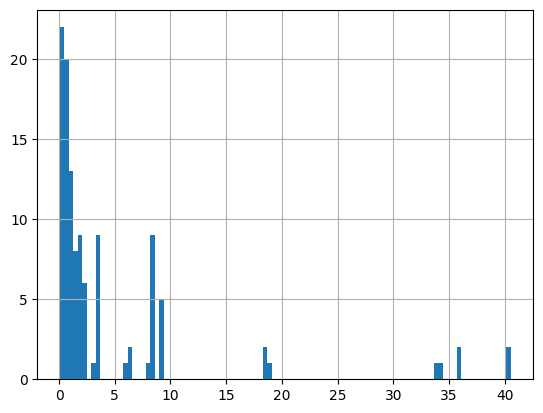

In [48]:
dfde_grouped['spatial_weight'].hist(bins=100)

## Comparison with the original data

In [68]:
dfde_original = gpd.read_parquet('../data/processed_datasets/simplified_DFDE_1984_2021_EPSG2154_FR.parquet')

In [69]:
dfde_original['index'] = dfde_original.index

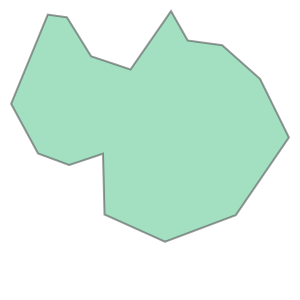

In [108]:
dfde_grouped.geometry = dfde_grouped.geometry.simplify(1000)

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


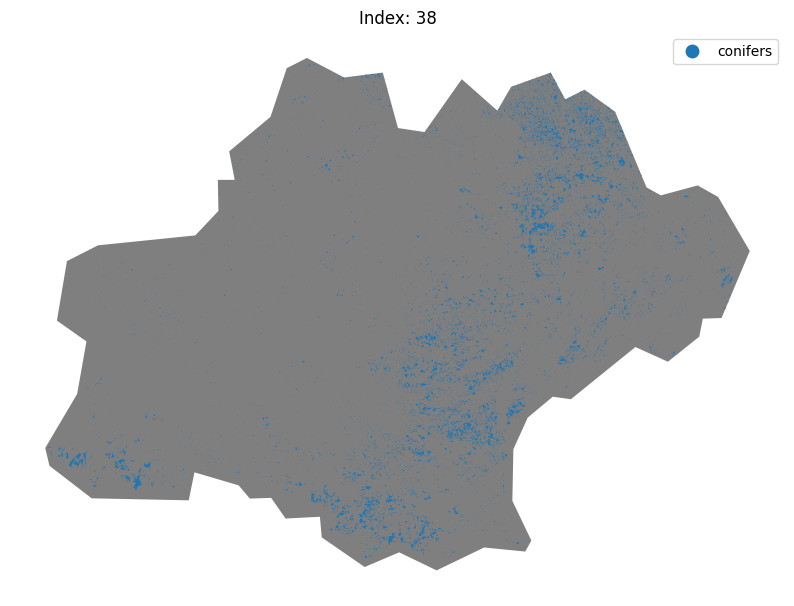

In [119]:
import matplotlib.pyplot as plt
index = 38
fig, ax = plt.subplots(figsize=(10,10))
dfde_original[dfde_original['index'] == index].plot(ax=ax, linestyle='--', color='k', alpha=0.5)
dfde_grouped[dfde_grouped['index'] == index].plot(ax=ax, column='essence_2', legend=True)
ax.set_title(f'Index: {index}')
ax.grid()
#drop the axis on the figures
ax.set_axis_off() 


## writing

In [121]:
dfde_grouped.rename(columns={'essence_2': 'essence_bdforet', 'essence_1':'essence', 'tree_type_1':'tree_type', 'index':'ref_dfde'}, inplace=True)
col = ['geometry', 'start_date', 'end_date', 'cause', 'class', 'ref_dfde', 'essence', 'essence_bdforet', 'tree_type'] 
dfde_grouped[col].to_parquet('../data/processed_datasets/simplified_refined_DFDE_1984_2021_EPSG2154_FR.parquet')

In [1]:
import geopandas as gpd
dfde = gpd.read_parquet('../data/processed_datasets/simplified_refined_DFDE_1984_2021_EPSG2154_FR.parquet')

In [2]:
a = dfde['geometry'].apply(lambda x: x.is_valid)

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [7]:
def repair_geometry(geom):
    if not geom.is_valid:
        return geom.buffer(0)
    return geom

# Apply the function to repair geometries
dfde['geometry'] = dfde['geometry'].apply(repair_geometry)

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [ ]:
dfde.to_parquet('../data/processed_datasets/simplified_refined_DFDE_1984_2021_EPSG2154_FR.parquet')